# Exercise 2: Data cleaning and processing 

In this exercise, we will look closer to the data and perform data cleaning. Data cleaning is mainly looking at two points: abnormality and missing data. 

First, we summarize the statistics of our data to identify the abnormal values in the dataset. 

In [56]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Load data
data = pd.read_csv("./data.csv", index_col=0)

# Descriptive statistics for each column
data.describe()

,subject_id,hadm_id,icustay_id,age,aniongap_min,aniongap_max,albumin_min,albumin_max,bicarbonate_min,bicarbonate_max,...,pt_min,pt_max,sodium_min,sodium_max,bun_min,bun_max,wbc_min,wbc_max,vent,mort_icu
count,61532.000000,61532.000000,61532.000000,61051.000000,53678.000000,53678.000000,19325.000000,19325.000000,54411.000000,54411.000000,...,46948.000000,46948.000000,54804.000000,54804.00000,52890.000000,52890.000000,59170.000000,59170.000000,61532.000000,61532.000000
mean,33888.605912,149954.470649,249962.710248,64.851857,13.043277,15.757741,3.115281,3.200476,22.670118,25.078192,...,14.893293,16.910052,136.661065,140.08174,24.039024,28.386141,11.012047,13.884411,0.400848,0.073328
std,28127.690913,28898.895904,28890.574867,56.969765,3.399661,4.728510,0.724105,0.713063,4.912506,4.482942,...,5.136238,9.472615,4.998585,4.64438,19.966592,22.823167,7.944417,10.730103,0.490074,0.260676
min,2.000000,100001.000000,200001.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,5.000000,...,2.390000,8.000000,1.210000,97.00000,1.000000,1.000000,0.100000,0.100000,0.000000,0.000000
25%,12047.500000,124933.750000,224935.500000,44.275900,11.000000,13.000000,2.600000,2.700000,20.000000,22.000000,...,12.700000,13.200000,134.000000,138.00000,12.000000,14.000000,7.000000,9.000000,0.000000,0.000000
50%,24280.500000,149911.500000,249940.000000,62.048700,13.000000,15.000000,3.100000,3.200000,23.000000,25.000000,...,13.600000,14.500000,137.000000,140.00000,17.000000,21.000000,9.740000,12.300000,0.000000,0.000000
75%,54191.500000,174997.250000,274972.500000,76.063400,15.000000,18.000000,3.600000,3.700000,25.000000,27.000000,...,15.100000,16.800000,140.000000,142.00000,29.000000,34.000000,13.400000,16.800000,1.000000,0.000000
max,99999.000000,199999.000000,299999.000000,311.561000,45.000000,59.000000,6.300000,6.300000,52.000000,53.000000,...,150.000000,150.000000,178.000000,182.00000,254.000000,272.000000,575.800000,846.700000,1.000000,1.000000


From the descriptive statistics, including mean, standard deviation, maximum etc, we would be able to find abnormal values if there exists. For this dataset, no abnormal values were immediately found. Another methods to use is to plot the distribution of features to identify whether the distribution is abnormal clinically. We take albumin_min as an example. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4e28eb2e8>]],
      dtype=object)

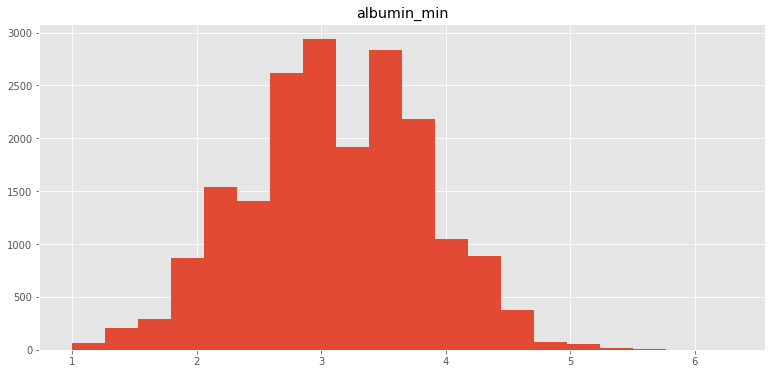

In [57]:
# Plot histogram of albumin_min to access the distribution. 
data.hist(column='albumin_min', bins=20, figsize=(13, 6))

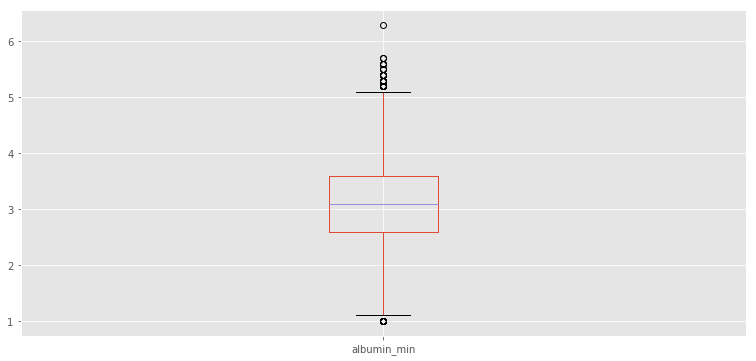

In [58]:
# Box plot is another useful graph to check the distribution as well as outliers. 
data.boxplot(column='albumin_min', figsize=(13, 6))

The distrubtion above is visually approximate to normal distribution and no abnormality is immediately found in this case. There exist outliers but the amount of outliers will not significantly detract our analysis. By checking the Descriptive statistics and the graphs, we can ensure the quality of our data. In addition, we may observe that there exists 'NaN' (Not a Number) in our data. It means that the patient has no measurement taken on the first day of ICU admission, as know as missing value. The missing value is problematic because machine learning models are required to have values on all cells of data table. In this example, the missing values were considered that it was not taken by ICU clinicians. We would impute the missing values by the mean feature value within the dataset to make sure that the imputed value does not change the data distribution. 

In [59]:
for column in data.columns:
    if column not in ['gender', 'first_careunit']:
        # Fill NaN in lab test measurements by mean values. 
        data[column].fillna(data[column].mean(), inplace=True)

In [60]:
data.head()

,subject_id,hadm_id,icustay_id,gender,age,first_careunit,aniongap_min,aniongap_max,albumin_min,albumin_max,...,pt_min,pt_max,sodium_min,sodium_max,bun_min,bun_max,wbc_min,wbc_max,vent,mort_icu
0,3,145834,211552,M,76.5268,MICU,15.000000,23.000000,1.800000,1.800000,...,13.500000,15.700000,136.000000,153.00000,41.000000,53.000000,11.3,24.4,1,0
1,4,185777,294638,F,47.8450,MICU,15.000000,15.000000,2.800000,2.800000,...,12.800000,12.800000,141.000000,141.00000,10.000000,10.000000,9.7,9.7,0,0
2,6,107064,228232,F,65.9407,SICU,20.000000,23.000000,3.000000,3.000000,...,12.600000,14.600000,134.000000,138.00000,62.000000,65.000000,10.6,10.6,0,0
3,7,118037,236754,F,0.0017,NICU,13.043277,15.757741,3.115281,3.200476,...,14.893293,16.910052,136.661065,140.08174,24.039024,28.386141,22.8,22.8,0,0
4,8,159514,262299,M,0.0012,NICU,13.043277,15.757741,3.115281,3.200476,...,14.893293,16.910052,136.661065,140.08174,24.039024,28.386141,18.7,18.7,1,0


In [61]:
# Save the imputed data into csv file
data.to_csv("./imputed_data.csv")

Now the data has not missing values. However, the data is still not ready to be feeded into machine learning models. In the next exercise, we will format and prepare the data for model fitting. 